# Descriptive Analysis

When trying to understand your data, it is typically impossible to just look at raw data and get much insight. We need ways to turn a bunch of data into a smaller set of numbers that are easily digestible summaries of your data. This will make them understandable both for you and for the people you work with. We call these **descriptive statistics**.

## Objectives

- Use business context to guide exploratory analyses
- Pose clear business-relevant questions and answer them with data
- Identify limitations of data for solving business problems

In [1]:
# Imports!
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
# Same as:
# import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# We'll start with chipotle data
# Be sure to set `sep='\t' since it's a tsv, not csv
# Tab seperated values
# instead of being seperated by commas, seperate by tabs
chipotle = pd.read_csv("data/chipotle.tsv", sep = "\t")

In [4]:
# Check it out
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [5]:
chipotle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [8]:
# Those item prices are gross - let's write a lambda function to clean that column!
# Capture the column in a new variable, item_prices
# step one remove dollar sign
# changed from a string to a float in order to work with the prices
#Dollar sign represents a string. 
# Can change a number to a float but not the same applies to a dollar sign
item_prices = chipotle['item_price'].apply(lambda x: float(x.replace("$", "")))

In [9]:
# Check it
item_prices

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

# Different Statistical Measures

## Measures of Center

One natural place to begin is to ask about where the **middle** of the data is. In other words, what is the value that is closest to our other values? 

There are three common measures used to describe the "middle":

- **Mean**: The sum of values / number of values
- **Median**: The value with as many values above it as below it
    - If the dataset has an even number of values, the median is the mean of the two middle numbers.
- **Mode**: The most frequent value(s)
    - A dataset can have multiple modes if multiple values are tied for the most frequent.

In [ ]:
# If mean and median aren't right on top of each other than the mean is being dragged by outlier(s)

Let's see what we have for our example:

In [19]:
print(f"Mean: {item_prices.mean()}")
print("*"*20)
print(f"Median: {item_prices.median()}")
print("*"*20)
print(f"Mode: {item_prices.mode()}")

Mean: 7.464335785374297
********************
Median: 8.75
********************
Mode: 0    8.75
dtype: float64


In [ ]:
# f-string: format string. Anything in squiggly brackets is a variable 
# {item_prices.mean():.3f}") to round it to the third decimal 

**Discussion**: If somebody asked you "How expensive are items at chipotle?", how would you answer?

- 


## Measures of Spread

Another natural question is about the **spread** of the data. In other words, how wide a range of values do you have? And how close or far are they from the "middle"?

### Min, Max, and Range

The minimum and maximum values of a dataset tell you the full extent of the values of your dataset. The range of the dataset is the difference between those two values.

In [20]:
print(f"Min: {item_prices.min()}")
print(f"Max: {item_prices.max()}")
print(f"Range: {item_prices.max() - item_prices.min()}")

Min: 1.09
Max: 44.25
Range: 43.16


### Percentiles and IQR

You can also calculate values at various **percentiles** to understand the spread. An "Nth Percentile" value is the value that is greater than N% of other values. The 25th and 75th percentiles are commonly used to describe spread, and the **interquartile range (IQR)** is the difference between these two values.

See [the docs](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) for more specifics about how percentiles are calculated, which is surprisingly tricky.

In [21]:
print(f"25th Percentile: {np.percentile(item_prices, 25)}")
print(f"75th Percentile: {np.percentile(item_prices, 75)}")
print(f"IQR: {np.percentile(item_prices, 75) - np.percentile(item_prices, 25)}")

25th Percentile: 3.39
75th Percentile: 9.25
IQR: 5.859999999999999


### Standard Deviation

The **standard deviation** is in effect the distance from the mean of the "average" data point. It is defined as: $$\sqrt\frac{\Sigma(x_i - \bar{x})^2}{n}$$

In [22]:
print(f"Standard Deviation: {item_prices.std()}")
# SD : distance from mean to a data point 

Standard Deviation: 4.245557197940302


In [23]:
np.std(item_prices)#, ddof=1)

4.245097896029731

In [24]:
item_prices.describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64

# Visual Description

A picture is worth a thousand words - or numbers! Here we will show how to use histograms and box-and-whisker plots to describe your data.

In [ ]:
# one variable and what it breaks down into use histogram or box and whisker plot

## Histograms

One natural way of starting to understand a dataset is to construct a **histogram**, which is a bar chart showing the counts of the different values in the dataset.

There will usually be many distinct values in your dataset, and you will need to decide how many **bins** to use in the histogram. The bins define the ranges of values captured in each bar in your chart. 

Text(0.5, 1.0, 'Counts, 14 Bins')

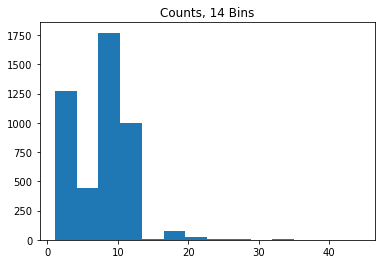

In [25]:
fig, ax = plt.subplots()
ax.hist(item_prices, bins=14)
plt.title('Counts, 14 Bins')

Text(0.5, 1.0, 'Counts, 10 Bins')

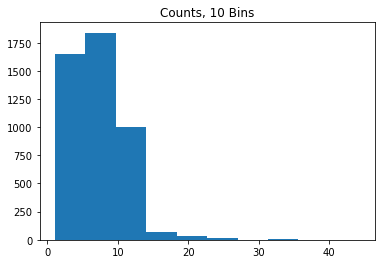

In [26]:
fig, ax = plt.subplots()
ax.hist(item_prices, bins=10)
plt.title('Counts, 10 Bins')

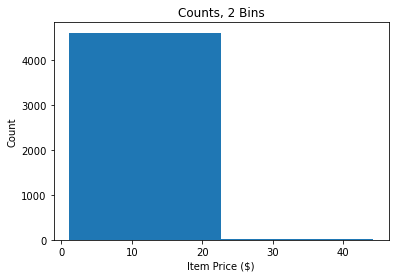

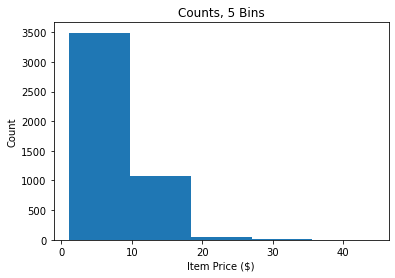

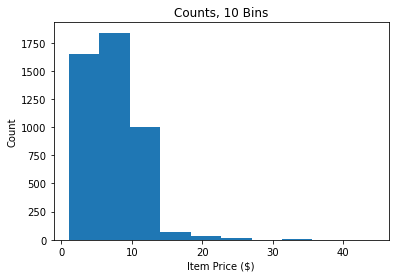

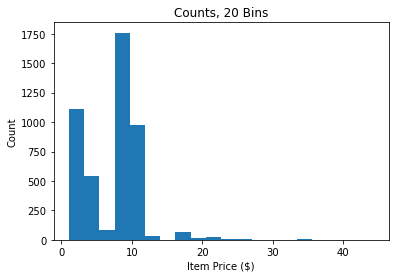

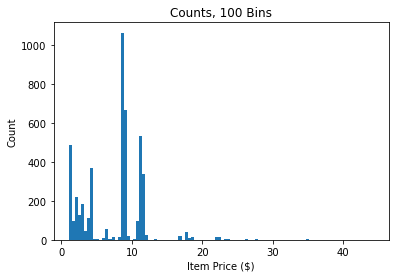

In [31]:
for bin_number in [2,5,10,20,100]:
    fig, ax = plt.subplots()
    ax.hist(item_prices, bins=bin_number)
    ax.set_title(f'Counts, {bin_number} Bins')
    ax.set_ylabel("Count")
    ax.set_xlabel("Item Price ($)")
    plt.show()
# code used to see different graphs with different bins instead of running code one by one 

Text(0.5, 1.0, 'Counts, 5 Bins')

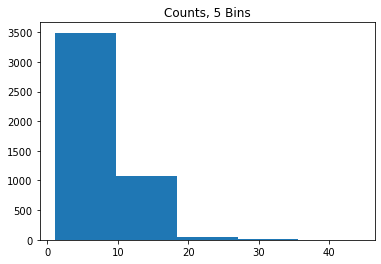

In [27]:
fig, ax = plt.subplots()
ax.hist(item_prices, bins=5)
plt.title('Counts, 5 Bins')

Text(0.5, 1.0, 'Counts, 2 Bins')

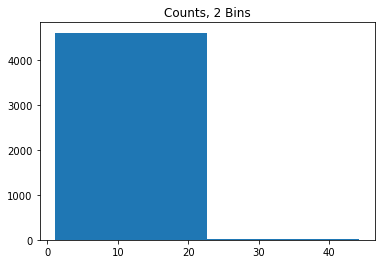

In [28]:
fig, ax = plt.subplots()
ax.hist(item_prices, bins=2)
plt.title('Counts, 2 Bins')

## Box and Whisker Plot

A box-and-whisker plot can also be useful for visually summarizing your data by showing the min, IQR, and max.

Text(0.5, 1.0, 'Counts of Pairs of Shoes')

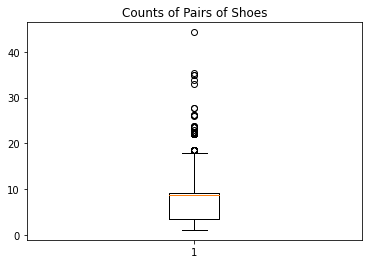

In [32]:
fig, ax = plt.subplots()
ax.boxplot(item_prices)
plt.title('Counts of Pairs of Shoes')
# a way to look at one column/variable
# NEVER use in a presentation

<AxesSubplot:xlabel='item_price'>

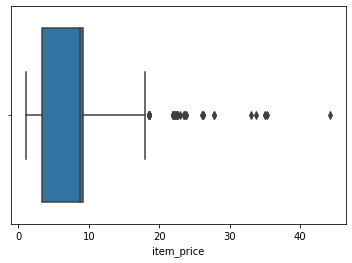

In [34]:
sns.boxplot(x=item_prices)

# Addressing Business Questions

## Fast Food Data

In [35]:
ffood = pd.read_csv('data/Datafiniti_Fast_Food.csv')

In [36]:
ffood.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


In [37]:
ffood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10000 non-null  object 
 1   dateAdded    10000 non-null  object 
 2   dateUpdated  10000 non-null  object 
 3   address      10000 non-null  object 
 4   categories   10000 non-null  object 
 5   city         10000 non-null  object 
 6   country      10000 non-null  object 
 7   keys         10000 non-null  object 
 8   latitude     10000 non-null  float64
 9   longitude    10000 non-null  float64
 10  name         10000 non-null  object 
 11  postalCode   10000 non-null  object 
 12  province     10000 non-null  object 
 13  sourceURLs   10000 non-null  object 
 14  websites     10000 non-null  object 
dtypes: float64(2), object(13)
memory usage: 1.1+ MB


### Question 1

How many different restaurant chains are represented in the data? Visualize the numbers for the restaurants with 50 or more instances.

In [49]:
# Your code here
ffood['name'].unique()

array(['SONIC Drive In', 'Taco Bell', "Arby's", "Steak 'n Shake",
       "Wendy's", 'Burger King', 'Chipotle Mexican Grill', '7-Eleven',
       'Dairy Queen', 'Mr. Hero', 'Golden Chick', "Carl's Jr", 'Checkers',
       "Rally's", "Togo's", 'Little Q Hot Pot', "McDonald's", 'Five Guys',
       'Boston Road Pizza', 'Boston Market',
       "D'Angelo Grilled Sandwiches", "Nino's Pizzarama",
       "Filippi's Pizza Grotto", 'Jack in the Box', 'Round Table Pizza',
       'El Pollo Loco', 'In-N-Out Burger', 'Copper Oven Artisan Pizza',
       'Del Taco', 'Little Caesars Pizza', 'Sbarro',
       "Casey's General Store", 'SUBWAY', "Fat Patty's", 'Pizza Hut',
       "Culver's", 'KFC', 'SONIC Drive-In', 'Whataburger', 'Chick-Fil-A',
       'Firehouse Subs', "Cupie's Drive-In", "Primo's Pizza",
       "Simple Simon's Pizza", 'CASA Mexicana', 'Bob Evans',
       'Players Grill', 'Back Yard Burgers', "Italo's Pizza",
       'Hunan Gardens', 'Toppers Pizza', 'Hernandez Mexican Restaurant',
       'Gl

In [50]:
ffood['name'] = ffood['name'].str.replace("-"," ")

In [51]:
ffood['name'] = ffood['name'].str.split('/')

In [52]:
ffood = ffood.explode(column='name')

In [53]:
ffood.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


In [48]:
# How many unique chains ?
len(ffood['name'].unique())

571

In [54]:
ffood.groupby('name').count()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,postalCode,province,sourceURLs,websites
name,,,,,,,,,,,,,,
A&W,1,1,1,1,1,1,1,1,1,1,1,1,1,1
AW,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Green Burrito,3,3,3,3,3,3,3,3,3,3,3,3,3,3
KFC,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Red Burrito,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zaxby's Chicken Fingers & Buffalo Wings,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Zio's Italian Kitchen,2,2,2,2,2,2,2,2,2,2,2,2,2,2
b.good,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [55]:
# Same as cell above 
ffood['name'].value_counts()

McDonald's                       1898
Taco Bell                        1035
Burger King                       834
Subway                            776
Arby's                            663
                                 ... 
Italian Pizzeria Restaurant         1
All About Burger                    1
Dominick's Italian Restaurant       1
Rick's Drive In Out                 1
Fat Patty's                         1
Name: name, Length: 569, dtype: int64

In [ ]:
# ffood.groupby('name').count()

In [60]:
chain_values = ffood['name'].value_counts()

In [62]:
chain_50 = chain_values.loc[chain_values > 50]

chain_50.values

array([1898, 1035,  834,  776,  663,  628,  330,  231,  218,  215,  206,
        166,  131,  119,  112,  100,   82,   76,   71,   71,   66,   61,
         57,   54,   54,   53,   52])

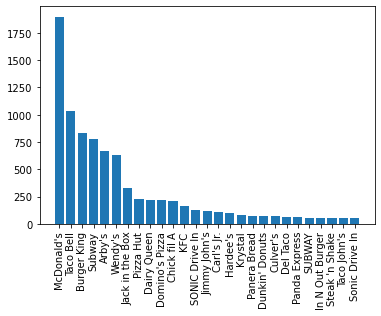

In [65]:
fig, ax = plt.subplots()

ax.bar(x=chain_50.index, height=chain_50.values)
#to make it more legible:
plt.xticks(rotation = 90);

<BarContainer object of 27 artists>

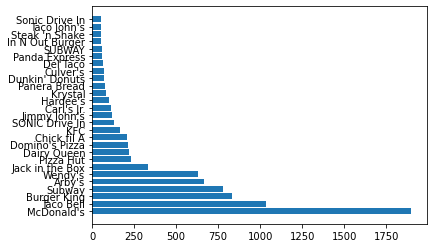

In [67]:
fig, ax = plt.subplots()

ax.barh(y=chain_50.index, width=chain_50.values)

### Question 2

Visualize the locations of restaurants in Buffalo, NY.

In [68]:
# Your code here
ffood.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


In [70]:
buffalo = ffood.loc[ffood['city'] == 'Buffalo']

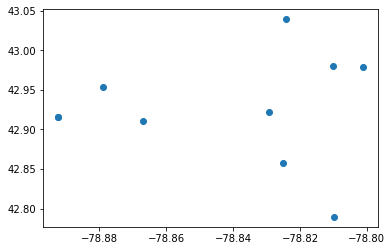

In [72]:
fig, ax = plt.subplots()

ax.scatter(x = buffalo['longitude'], y = buffalo['latitude'])

### Your Turn:

Work on questions 3-5 below in small groups:

### Question 3

In this dataset, how many Taco Bell restaurants are there in Alaska, and in which cities are they?

In [86]:
# Your code here
alaska = ffood.loc[(ffood['province'] == 'AK') & (ffood['name'] == 'Taco Bell')]
len(alaska)

3

In [87]:
alaska['city'].unique()

array(['Fairbanks', 'Anchorage'], dtype=object)

### Question 4

Convert the ZIP Codes to (five-digit) integers.

In [89]:
# Your code here
ffood['postalCode'] = ffood['postalCode'].str.split('-').str[0].astype(int)
ffood['postalCode']
#same as: 
# ffood['postalCode'].apply(lambda x: int(x[:5]))

0       70301
1       70301
2       37863
3       37863
4       30260
        ...  
9995    27106
9996    27107
9997    27284
9998    27893
9999    28337
Name: postalCode, Length: 10018, dtype: int64

### Question 5

Which restaurant chain has the greatest representation in San Francisco, CA? (This city covers all the ZIP Codes between 94100 and 94188, inclusive)

In [93]:
# Your code here
sf = ffood.loc[(ffood['postalCode'] >= 94100) & (ffood['postalCode'] <= 94188) ]

In [94]:
sf['name'].value_counts()

Subway                     5
Burger King                2
Chipotle Mexican Grill     1
McDonald's                 1
De Afghanan Kabob House    1
Domino's Pizza             1
Taqueria                   1
Panda Express              1
Pollo Campero              1
Batter Up                  1
VeganBurg                  1
Name: name, dtype: int64

## Credit Card Data

In [ ]:
credit = pd.read_csv('data/BankChurners.csv',
                     # Using a lambda function to ignore two unnecessary columns
                     usecols=lambda x: "Naive_Bayes" not in x)

In [ ]:
credit.head()

In [ ]:
credit.describe()

In [ ]:
credit['Attrition_Flag'].value_counts()

We work for a credit card company and are worried about customers churning (becoming attrited).

### Your Turn: Second Exercise!

In breakout rooms, work on questions 1-3 below:

### Question 1

Get the means of the numerical columns for the existing and the attrited customers separately.

In [ ]:
# Your code here

### Question 2

Visualize the distributions of total revolving balances for each group.

In [ ]:
# Your code here

### Question 3

Make two bar charts counting the numbers in each income category for each group separately.

In [ ]:
# Your code here